In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
model_data = '/content/drive/My Drive/FYDP/Prototype - I1/model_data.csv'
df = pd.read_csv(model_data)
df.shape

(8105, 7)

# Columns to use

In [ ]:
def all_cols(df1):
  #df1 = df
  df1 = enc_cond(df1)
  df1 = enc_gen(df1)
  df1 = one_hot(df1, ['brand', 'size','colour','category-1'])
  X = df1.drop('price', axis=1) # inputs
  y = df1['price'] # output
  # X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
  # X_val, X_test, y_val, y_test = split_data(X_val1, y_val1, 3, 0.4) # split into 15/10 
  return X, y

def no_colour(df1):
  #df1 = df
  df1 = df1.drop('colour', axis=1)
  df1 = enc_cond(df1)
  df1 = enc_gen(df1)
  df1 = one_hot(df1, ['brand', 'size','category-1'])
  # print(df1.head())
  X = df1.drop('price', axis=1) # inputs
  y = df1['price'] # output
  # X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
  # X_val, X_test, y_val, y_test = split_data(X_val1, y_val1, 3, 0.4) # split into 15/10 
  return X, y

def no_gender(df1):
  #df1 = df
  df1 = df1.drop('gender', axis=1)
  df1 = enc_cond(df1)
  # df1 = enc_gen(df1)
  df1 = one_hot(df1, ['brand', 'colour', 'size','category-1'])
  X = df1.drop('price', axis=1) # inputs
  y = df1['price'] # output
  # X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
  # X_val, X_test, y_val, y_test = split_data(X_val1, y_val1, 3, 0.4) # split into 15/10 
  return X, y

def no_size(df1):
  #df1 = df
  df1 = df1.drop('size', axis=1)
  df1 = enc_cond(df1)
  df1 = enc_gen(df1)
  df1 = one_hot(df1, ['brand', 'colour', 'category-1'])
  X = df1.drop('price', axis=1) # inputs
  y = df1['price'] # output
  # X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
  # X_val, X_test, y_val, y_test = split_data(X_val1, y_val1, 3, 0.4) # split into 15/10 
  return X, y

def no_colour_size(df1):
  #df1 = df
  df1 = df1.drop(['colour','size'], axis=1)
  df1 = enc_cond(df1)
  df1 = enc_gen(df1)
  df1 = one_hot(df1, ['brand', 'category-1'])
  X = df1.drop('price', axis=1) # inputs
  y = df1['price'] # output
  # X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
  # X_val, X_test, y_val, y_test = split_data(X_val1, y_val1, 3, 0.4) # split into 15/10 
  return X, y

def no_colour_gender(df1):
  #df1 = df
  df1 = df1.drop(['colour','gender'], axis=1)
  df1 = enc_cond(df1)
  #df1 = enc_gen(df1)
  df1 = one_hot(df1, ['brand', 'size','category-1'])
  # print(df1.head())
  X = df1.drop('price', axis=1) # inputs
  y = df1['price'] # output
  # X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
  # X_val, X_test, y_val, y_test = split_data(X_val1, y_val1, 3, 0.4) # split into 15/10 
  return X, y

def no_gender_size(df1):
  #df1 = df
  df1 = df1.drop(['gender','size'], axis=1)
  df1 = enc_cond(df1)
  #df1 = enc_gen(df1)
  df1 = one_hot(df1, ['brand','colour', 'category-1'])
  # print(df1.head())
  X = df1.drop('price', axis=1) # inputs
  y = df1['price'] # output
  # X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
  # X_val, X_test, y_val, y_test = split_data(X_val1, y_val1, 3, 0.4) # split into 15/10 
  return X, y

# key cols = Brand, Condition, Category-1, Price
def key_cols(df1):
  #df1 = df
  df1 = df1.drop(['colour','gender','size'], axis=1)
  df1 = enc_cond(df1)
  # df1 = enc_gen(df1)
  df1 = one_hot(df1, ['brand', 'category-1'])
  # print(df1.head())
  X = df1.drop('price', axis=1) # inputs
  y = df1['price'] # output
  # X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
  # X_val, X_test, y_val, y_test = split_data(X_val1, y_val1, 3, 0.4) # split into 15/10 
  return X, y

In [ ]:
# label encoding functions
def enc_cond(df1):
  label_enc_condition = {'Satisfactory':1, 'Good':2, 'Very good':3, 'New without tags':4, 'New with tags':5}
  df1 = df1.replace({"condition": label_enc_condition})
  return df1
def enc_gen(df1):
  label_enc_gender = {'men':0, 'women':1}
  df1 = df1.replace({"gender": label_enc_gender})
  return df1

# one hot encoding function
def one_hot(df1, cols):
  df1 = pd.get_dummies(df1, columns=cols)
  return df1

# Test split and Kfold

In [ ]:
from sklearn.model_selection import train_test_split
def split_data(X, y, seed, split_size):
  seed = seed
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=seed)
  return  X_train, X_test, y_train, y_test

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from tabulate import tabulate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Plug and Chug all the models and do train/test split and kfold

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

clf_lr = LinearRegression()
clf_ridge = Ridge(alpha=1.2,  max_iter=100)
clf_lasso = Lasso()
clf_knn = KNeighborsRegressor(n_neighbors=9)
clf_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [ ]:
def val(clf_lr):
  dfs = [all_cols, no_colour, no_gender, no_size, no_colour_size, no_colour_gender, no_gender_size, key_cols]
  r2 = []
  adj_r2 = []
  mses = []
  cross_val = []
  cross_val_mean = []
  for i in dfs:
    df1 = df
    X, y = i(df1)
    X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25)
    clf_lr.fit(X_train, y_train)
    y_predict = clf_lr.predict(X_val)
    r2_score = clf_lr.score(X_val, y_val)
    r2.append(r2_score)
    a_r2 = 1 - (1-r2_score) * ((len(y_val) - 1) / (len(y_val) -  X_val.shape[1] - 1))
    adj_r2.append(a_r2)
    mses.append(mse(y_val, y_predict))

    cvScore = cross_val_score(clf_lr, X, y, cv = cv, scoring='r2')
    cross_val.append("%0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))

    mean_score = cross_val_score(clf_lr, X, y, cv = cv, scoring='neg_mean_squared_error')
    cross_val_mean.append("%0.2f" % (abs(mean_score.mean())))
  dfs_names = ['all_features', 'no_colour', 'no_gender', 'no_size', 'no_colour_size', 'no_colour_gender', 'no_gender_size', 'no_gender_size_colour']
  headers = ['Features Included', 'R^2 Score using Test/Train', 'Adjusted R^2 Score using Test/Train', 'Mean Squared Error', 'R^2 Score using Cross_Validation', 'Mean']
  table = zip(dfs_names, r2, adj_r2, mses, cross_val, cross_val_mean)
  print(tabulate(table, headers=headers))
  return [y_val, y_predict]

In [ ]:
lr_y_values = val(clf_lr)

Features Included        R^2 Score using Test/Train    Adjusted R^2 Score using Test/Train    Mean Squared Error  R^2 Score using Cross_Validation      Mean
---------------------  ----------------------------  -------------------------------------  --------------------  ----------------------------------  ------
all_features                               0.250266                               0.214601               231.146  0.26 (+/- 0.05)                     224.43
no_colour                                  0.251951                               0.221599               230.626  0.26 (+/- 0.05)                     224.22
no_gender                                  0.239035                               0.203248               234.608  0.25 (+/- 0.05)                     227.51
no_size                                    0.250234                               0.215784               231.156  0.26 (+/- 0.05)                     224.26
no_colour_size                             0.25224        

In [ ]:
ridge_y_values = val(clf_ridge)

Features Included        R^2 Score using Test/Train    Adjusted R^2 Score using Test/Train    Mean Squared Error  R^2 Score using Cross_Validation      Mean
---------------------  ----------------------------  -------------------------------------  --------------------  ----------------------------------  ------
all_features                               0.25019                                0.214522               231.169  0.26 (+/- 0.05)                     223.99
no_colour                                  0.252107                               0.221761               230.578  0.26 (+/- 0.05)                     223.93
no_gender                                  0.240217                               0.204486               234.244  0.25 (+/- 0.05)                     227.29
no_size                                    0.250375                               0.215932               231.112  0.26 (+/- 0.05)                     223.9
no_colour_size                             0.252314        

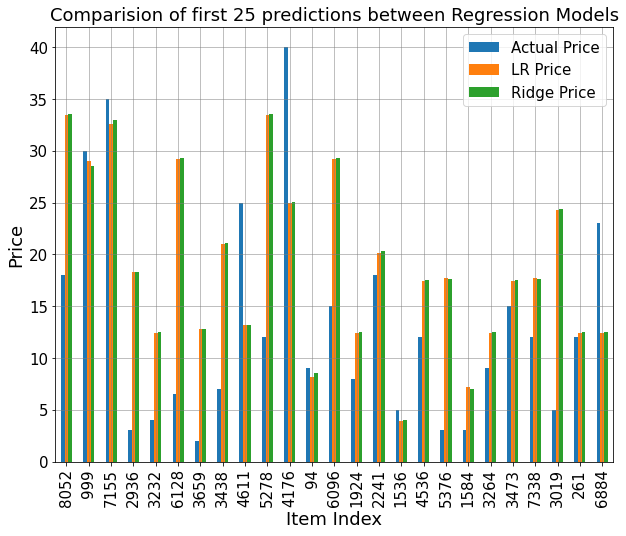

In [ ]:
df_reg = pd.DataFrame({'Actual Price' : lr_y_values[0], 'LR Price': lr_y_values[1], 'Ridge Price': ridge_y_values[1]})#, 'KNN Price': knn_y_values[1]})
df_reg1 = df_reg.head(25)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
df_reg1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Item Index', fontsize=18) 
plt.ylabel('Price', fontsize=18) 
plt.title('Comparision of first 25 predictions between Regression Models', fontsize=18)
plt.show()

In [ ]:
val(clf_lasso)

Features Included        R^2 Score using Test/Train    Adjusted R^2 Score using Test/Train    Mean Squared Error  R^2 Score using Cross_Validation
---------------------  ----------------------------  -------------------------------------  --------------------  ----------------------------------
all_features                               0.101861                              0.059137                  276.9  0.10 (+/- 0.03)
no_colour                                  0.101861                              0.0654191                 276.9  0.10 (+/- 0.03)
no_gender                                  0.101861                              0.0596232                 276.9  0.10 (+/- 0.03)
no_size                                    0.101861                              0.0605942                 276.9  0.10 (+/- 0.03)
no_colour_size                             0.101861                              0.0668569                 276.9  0.10 (+/- 0.03)
no_colour_gender                           0.101861   

In [ ]:
knn_y_values = val(clf_knn)

Features Included        R^2 Score using Test/Train    Adjusted R^2 Score using Test/Train    Mean Squared Error  R^2 Score using Cross_Validation      Mean
---------------------  ----------------------------  -------------------------------------  --------------------  ----------------------------------  ------
all_features                               0.169183                               0.129661               256.144  0.18 (+/- 0.07)                     247.49
no_colour                                  0.194734                               0.16206                248.267  0.18 (+/- 0.07)                     248.32
no_gender                                  0.15114                                0.111219               261.707  0.15 (+/- 0.08)                     256.85
no_size                                    0.167558                               0.129309               256.645  0.18 (+/- 0.06)                     246.73
no_colour_size                             0.215879       

In [ ]:
val(clf_rf)

Features Included        R^2 Score using Test/Train    Adjusted R^2 Score using Test/Train    Mean Squared Error  R^2 Score using Cross_Validation
---------------------  ----------------------------  -------------------------------------  --------------------  ----------------------------------
all_features                               0.183243                               0.14439                251.809  0.16 (+/- 0.07)
no_colour                                  0.220413                               0.188781               240.35   0.21 (+/- 0.07)
no_gender                                  0.143374                               0.103088               264.101  0.15 (+/- 0.08)
no_size                                    0.190265                               0.153059               249.644  0.18 (+/- 0.07)
no_colour_size                             0.234918                               0.205099               235.878  0.23 (+/- 0.07)
no_colour_gender                           0.202013   

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
df1 = df
X, y = all_cols(df1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [ ]:
leaf_size = list(range(30,35))
n_neighbors = list(range(20,27))
p = [1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
#Convert to dictionary
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p)#, algorithm = algorithm)

In [ ]:
knn_2 = KNeighborsRegressor()
clf = GridSearchCV(knn_2, hyperparameters)
# Fit the model
best_model = clf.fit(X_train,y_train)
# Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 2
Best n_neighbors: 26


In [ ]:
neigh = KNeighborsRegressor(n_neighbors=26, p=2, leaf_size=30)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
mse(y_test, y_predict)

248.38001182964885

In [ ]:
knn_3 = KNeighborsRegressor()
clf_ran = RandomizedSearchCV(knn_3, hyperparameters)
best_model_ran = clf_ran.fit(X_train,y_train)
print('Best leaf_size:', best_model_ran.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_ran.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_ran.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 2
Best n_neighbors: 25


In [ ]:
neigh = KNeighborsRegressor(n_neighbors=25, p=2, leaf_size=30)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
mse(y_test, y_predict)

247.74059816359156